In [31]:
import pandas as pd
df = pd.read_csv("Qualification en maths et sciences de l'éd..csv" , sep=',', encoding='cp1252', low_memory=False)
df.head()




,Country,Major in Math & Math Ed (%),Major in Math & Math Ed (Avg),Major in Math Only (%),Major in Math Only (Avg),Major in Math Ed Only (%),Major in Math Ed Only (Avg),All Other Majors (%),All Other Majors (Avg),No Formal Education (%),No Formal Education (Avg)
0,Australia,46,527,15,506,16,522.0,24,497.0,0,NaN
1,Austria,19,507,3,477,73,523.0,5,484.0,0,NaN
2,Azerbaijan,38,483,59,476,0,NaN,2,NaN,1,NaN
3,Bahrain,44,432,42,419,11,435.0,3,408.0,0,NaN
4,Brazil,73,382,25,376,0,NaN,2,NaN,0,NaN


In [5]:
df.columns

Index(['Country', 'Major in Math & Math Ed (%)',
       'Major in Math & Math Ed (Avg)', 'Major in Math Only (%)',
       'Major in Math Only (Avg)', 'Major in Math Ed Only (%)',
       'Major in Math Ed Only (Avg)', 'All Other Majors (%)',
       'All Other Majors (Avg)', 'No Formal Education (%)',
       'No Formal Education (Avg)'],
      dtype='object')

In [11]:
line_highest = df['Major in Math & Math Ed (Avg)'].idxmax()
df.loc[line_highest]

Country                          Chinese Taipei
Major in Math & Math Ed (%)                  41
Major in Math & Math Ed (Avg)               609
Major in Math Only (%)                       39
Major in Math Only (Avg)                    612
Major in Math Ed Only (%)                     7
Major in Math Ed Only (Avg)               583.0
All Other Majors (%)                         13
All Other Majors (Avg)                    566.0
No Formal Education (%)                       0
No Formal Education (Avg)                   NaN
Name: 6, dtype: object

In [13]:
line_lowest = df['Major in Math & Math Ed (Avg)'].idxmin()
df.loc[line_lowest]

Country                          Cote d'Ivoire
Major in Math & Math Ed (%)                 49
Major in Math & Math Ed (Avg)              257
Major in Math Only (%)                      30
Major in Math Only (Avg)                   276
Major in Math Ed Only (%)                    5
Major in Math Ed Only (Avg)              318.0
All Other Majors (%)                        12
All Other Majors (Avg)                   249.0
No Formal Education (%)                      5
No Formal Education (Avg)                247.0
Name: 7, dtype: object

In [15]:
df.columns

Index(['Country', 'Major in Math & Math Ed (%)',
       'Major in Math & Math Ed (Avg)', 'Major in Math Only (%)',
       'Major in Math Only (Avg)', 'Major in Math Ed Only (%)',
       'Major in Math Ed Only (Avg)', 'All Other Majors (%)',
       'All Other Majors (Avg)', 'No Formal Education (%)',
       'No Formal Education (Avg)'],
      dtype='object')

In [21]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df["Major in Math & Math Ed (%)"], df["Major in Math & Math Ed (Avg)"])
print(f"Corrélation Spearman: {corr}, p-value: {p_value}")


Corrélation Spearman: 0.014506441518125832, p-value: 0.926438386075357


In [23]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df["Major in Math Only (%)"], df["Major in Math Only (Avg)"])
print(f"Corrélation Spearman: {corr}, p-value: {p_value}")

Corrélation Spearman: -0.31159072315757863, p-value: 0.041954052670104235


In [25]:
#A l'international, la corrélation entre le fait qu'un prof ait suivi une formation en maths et ou pédagogie math
#est très faible


In [29]:
tres_eleve = [
    'Norway', 'Australia', 'USA', 'Sweden', 'Finland', 'Singapore', 'Hong Kong SAR',
    'Ireland', 'England', 'Chinese Taipei', 'Japan', 'Israel', 'Austria', 'Korea',
    'France', 'Italy', 'UAE', 'Cyprus', 'Czech Republic', 'Portugal', 'Lithuania',
    'Malta', 'Qatar', 'Oman', 'Saudi Arabia', 'Bahrain', 'Hungary', 'TÃ¼rkiye',
    'Chile', 'Malaysia', 'Kuwait'
]
eleve = [
    'Iran', 'Georgia', 'Kazakhstan', 'Uzbekistan', 'Jordan', 'Brazil', 'Azerbaijan'
]
moyen = [
    'Morocco', 'Palestinian Authority'
]
faible = [
    "Cote d'Ivoire"
]

# Filtrer pour ces pays seulement
df_pays_IDH_TFort = df[df['Country'].isin(tres_eleve)]
df_pays_IDH_Fort = df[df['Country'].isin(eleve)]
df_pays_IDH_Moyen = df[df['Country'].isin(moyen)]
df_pays_IDH_Faible = df[df['Country'].isin(faible)]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import seaborn as sbn
import random

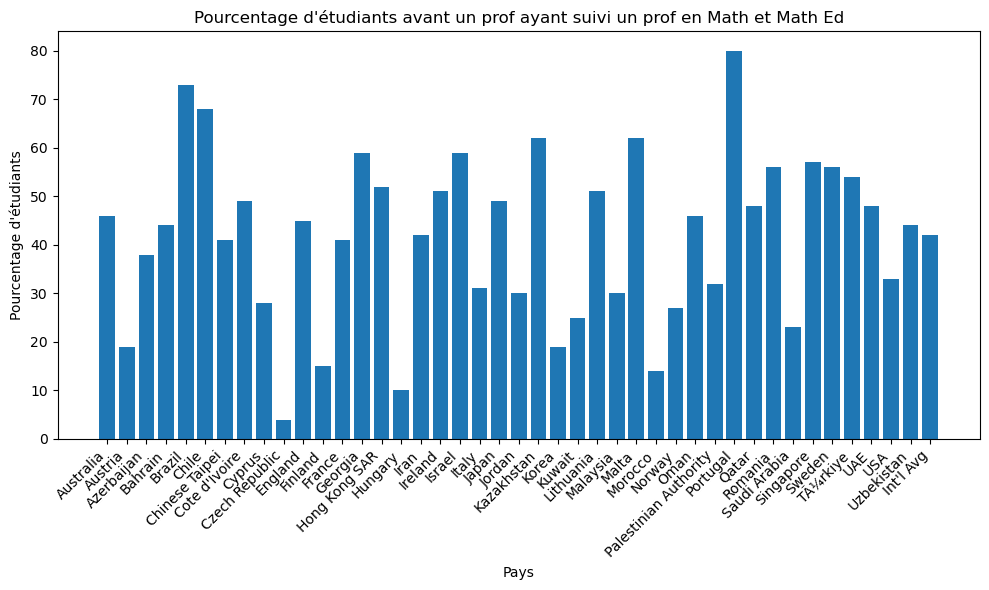

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(df["Country"], df["Major in Math & Math Ed (%)"])

plt.title("Pourcentage d'étudiants avant un prof ayant suivi un prof en Math et Math Ed")
plt.xlabel("Pays")
plt.ylabel("Pourcentage d'étudiants")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

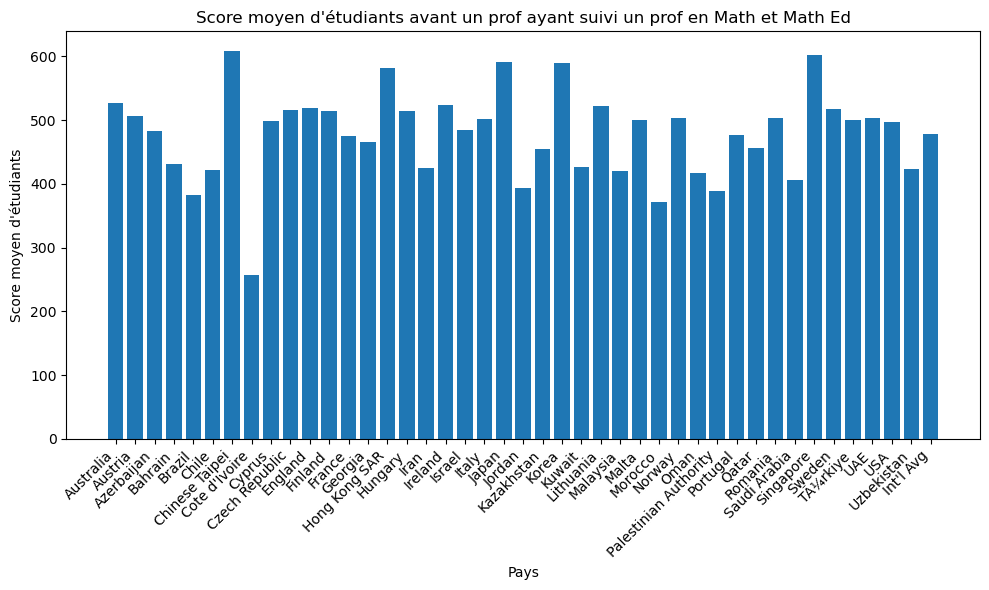

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(df["Country"], df["Major in Math & Math Ed (Avg)"])

plt.title("Score moyen d'étudiants avant un prof ayant suivi un prof en Math et Math Ed")
plt.xlabel("Pays")
plt.ylabel("Score moyen d'étudiants")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
df_sorted = df.sort_values(by='Major in Math & Math Ed (%)', ascending=False)

# Top 10 pays avec les meilleurs scores
top_10 = df_sorted.head(10)

# Bottom 10 pays avec les scores les plus bas
bottom_10 = df_sorted.tail(10)

# Affichage
print("🔝 Top 10 pays avec le plus haut 'Major in Math & Math Ed (%) :")
print(top_10)


🔝 Top 10 pays avec le plus haut 'Major in Math & Math Ed (%) :
       Country  Major in Math & Math Ed (%)  Major in Math & Math Ed (Avg)  \
32    Portugal                           80                            477   
4       Brazil                           73                            382   
5        Chile                           68                            422   
22  Kazakhstan                           62                            455   
27       Malta                           62                            500   
13     Georgia                           59                            466   
18      Israel                           59                            485   
36   Singapore                           57                            602   
37      Sweden                           56                            518   
34     Romania                           56                            504   

    Major in Math Only (%)  Major in Math Only (Avg)  \
32                    

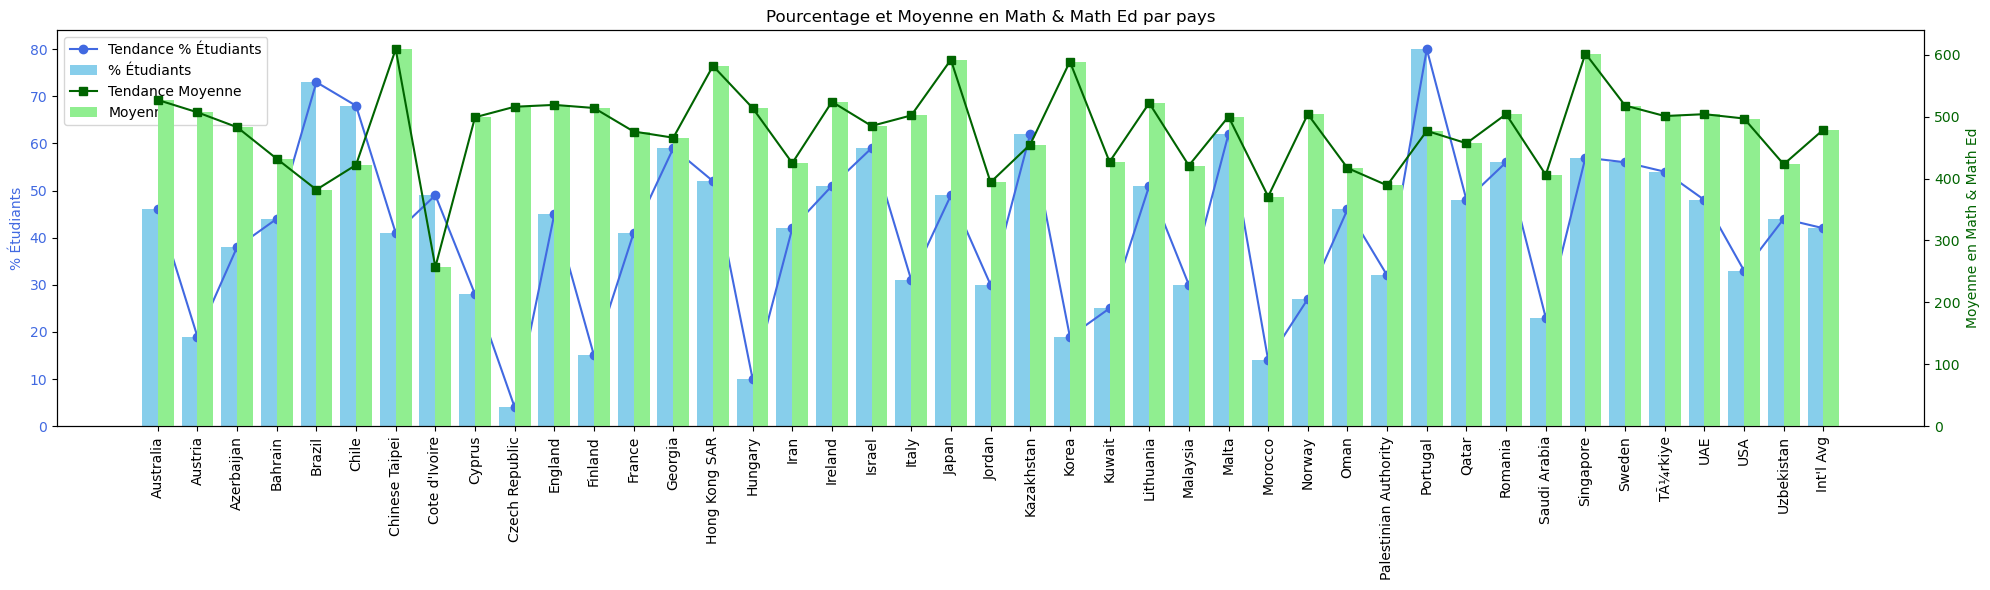

In [69]:
pays = df['Country']
pourcentage = df['Major in Math & Math Ed (%)']
moyenne = df['Major in Math & Math Ed (Avg)']

x = np.arange(len(pays))

fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()

bar_width = 0.4

# Barres pourcentage sur ax1
ax1.bar(x - bar_width/2, pourcentage, bar_width, color='skyblue', label='% Étudiants')
# Courbe pourcentage sur ax1
ax1.plot(x, pourcentage, color='royalblue', marker='o', label='Tendance % Étudiants')

# Barres moyenne sur ax2
ax2.bar(x + bar_width/2, moyenne, bar_width, color='lightgreen', label='Moyenne')

# Courbe moyenne sur ax2
ax2.plot(x, moyenne, color='darkgreen', marker='s', label='Tendance Moyenne')

ax1.set_xticks(x)
ax1.set_xticklabels(pays, rotation=90)

ax1.set_ylabel('% Étudiants', color='royalblue')
ax2.set_ylabel('Moyenne en Math & Math Ed', color='darkgreen')

ax1.tick_params(axis='y', labelcolor='royalblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')

ax1.set_title("Pourcentage et Moyenne en Math & Math Ed par pays")

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
print("\n🔻 Bottom 10 pays avec le plus bas 'Major in Math & Math Ed (%) :")
print(bottom_10)


🔻 Bottom 10 pays avec le plus bas 'Major in Math & Math Ed (%) :
           Country  Major in Math & Math Ed (%)  \
8           Cyprus                           28   
29          Norway                           27   
24          Kuwait                           25   
35    Saudi Arabia                           23   
23           Korea                           19   
1          Austria                           19   
11         Finland                           15   
28         Morocco                           14   
15         Hungary                           10   
9   Czech Republic                            4   

    Major in Math & Math Ed (Avg)  Major in Math Only (%)  \
8                             499                      71   
29                            504                      60   
24                            427                      49   
35                            406                      63   
23                            589                      37   
1     

In [19]:
df_sorted = df.sort_values(by='Major in Math & Math Ed (Avg)', ascending=False)

# Top 10 pays avec les meilleurs scores
top_10 = df_sorted.head(10)

# Bottom 10 pays avec les scores les plus bas
bottom_10 = df_sorted.tail(10)

# Affichage
print("🔝 Top 10 pays avec le plus haut 'Major in Math & Math Ed (Avg) :")
print(top_10)


🔝 Top 10 pays avec le plus haut 'Major in Math & Math Ed (Avg) :
           Country  Major in Math & Math Ed (%)  \
6   Chinese Taipei                           41   
36       Singapore                           57   
20           Japan                           49   
23           Korea                           19   
14   Hong Kong SAR                           52   
0        Australia                           46   
17         Ireland                           51   
25       Lithuania                           51   
10         England                           45   
37          Sweden                           56   

    Major in Math & Math Ed (Avg)  Major in Math Only (%)  \
6                             609                      39   
36                            602                      30   
20                            592                      32   
23                            589                      37   
14                            582                      13   
0      

In [29]:
pays = df['Country']
pourcentage = df['Major in Math Only (%)']
moyenne = df['Major in Math Only (Avg)']

x = np.arange(len(pays))

fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()

bar_width = 0.4

# Barres pourcentage sur ax1
ax1.bar(x - bar_width/2, pourcentage, bar_width, color='skyblue', label='% Étudiants')
# Courbe pourcentage sur ax1
ax1.plot(x, pourcentage, color='royalblue', marker='o', label='Tendance % Étudiants')

# Barres moyenne sur ax2
ax2.bar(x + bar_width/2, moyenne, bar_width, color='lightgreen', label='Moyenne')

# Courbe moyenne sur ax2
ax2.plot(x, moyenne, color='darkgreen', marker='s', label='Tendance Moyenne')

ax1.set_xticks(x)
ax1.set_xticklabels(pays, rotation=90)

ax1.set_ylabel('% Étudiants', color='royalblue')
ax2.set_ylabel('Moyenne en Math , color='darkgreen')

ax1.tick_params(axis='y', labelcolor='royalblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
               

ax1.set_title("Pourcentage et Moyenne en Math par pays")

# Légendes combinées
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 27) (895431258.py, line 27)